In [30]:
import pandas as pd
import os
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Load libraries
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from scipy.stats import randint

In [29]:
# import dataset
data_path = './Data Science Prospective Candidate Model Data_2023-03.xlsx'

df = pd.read_excel(data_path)

In [3]:
df.head(5)

,Salesforce Quote ID,Salesforce Account ID,Industry Group,IsPrimary,Quote ID,Account ID,Industry Group.1,IsPrimary.1,Opportunity Status,AccountingMonth,...,TermInMonths,Number Of Seats,Customer Health Score,Additional Discount Off List,Company Discount %,Partner Discount Off List,Quote Line Discount Off List,List Total (USD),Net Amount (USD),Number of Items
0,a0s3l00000AaabbAAB,0011N00001kQIiQQAW,Finance,True,a0s3l00000AaabbAAB,0011N00001kQIiQQAW,Finance,True,Closed Lost,2020-10-01,...,12.0,350.0,0,0.000,0.000,0.000,0.000,23688,23688,2
1,a0s3l00000AaaT7AAJ,0011N00001cgmmhQAA,Real Estate,True,a0s3l00000AaaT7AAJ,0011N00001cgmmhQAA,Real Estate,True,Closed Lost,2022-12-01,...,12.0,6000.0,0,0.008,0.731,0.054,0.792,529505,113973,8
2,a0s3l00000AaaXPAAZ,0013l000027RPAMAA4,Other,True,a0s3l00000AaaXPAAZ,0013l000027RPAMAA4,Other,True,Closed Lost,2021-11-01,...,12.0,75.0,0,0.000,0.000,0.000,0.000,4050,4050,2
3,a0s3l00000AaaZLAAZ,0013l000027Rqk5AAC,"Healthcare, Pharma, & Biotech",True,a0s3l00000AaaZLAAZ,0013l000027Rqk5AAC,"Healthcare, Pharma, & Biotech",True,Closed Lost,2021-03-01,...,12.0,700.0,0,0.000,0.000,0.000,0.000,19281,19281,2
4,a0s3l00000AabQPAAZ,0013l000027SBnsAAG,"Healthcare, Pharma, & Biotech",True,a0s3l00000AabQPAAZ,0013l000027SBnsAAG,"Healthcare, Pharma, & Biotech",True,Closed Lost,2021-03-01,...,12.0,3500.0,0,0.000,0.100,0.225,0.325,62518,42200,4


In [4]:
df.columns # check on all columns in the given dataset

Index(['Salesforce Quote ID', 'Salesforce Account ID', 'Industry Group',
       'IsPrimary', 'Quote ID', 'Account ID', 'Industry Group.1',
       'IsPrimary.1', 'Opportunity Status', 'AccountingMonth', 'Segmentation',
       'Business Type', 'Discount Deal Type', 'Quote Status',
       'PartnerProcurementOption (DimOpportunity)', 'Partner ID',
       'Reporting Region', 'TermInMonths', 'Number Of Seats',
       'Customer Health Score', 'Additional Discount Off List',
       'Company Discount %', 'Partner Discount Off List',
       'Quote Line Discount Off List', 'List Total (USD)', 'Net Amount (USD)',
       'Number of Items'],
      dtype='object')

In [5]:
df.shape # check on data dimensions

(16508, 27)

In [31]:
df.describe()

,TermInMonths,Number Of Seats,Customer Health Score,Additional Discount Off List,Company Discount %,Partner Discount Off List,Quote Line Discount Off List,List Total (USD),Net Amount (USD),Number of Items
count,16326.000000,16503.000000,16508.000000,16346.000000,16346.000000,16346.000000,16346.000000,1.650800e+04,1.650800e+04,16508.000000
mean,13.488796,2534.955220,24.458687,0.018329,0.313325,0.146664,0.478314,1.553165e+05,4.482306e+04,4.716562
std,6.372941,15963.254779,25.290240,0.332210,0.278990,0.110192,0.411796,1.109281e+06,1.868831e+05,1.707033
min,1.000000,0.000000,0.000000,-16.106000,-10.419000,-0.153000,-16.573000,0.000000e+00,-3.720900e+04,1.000000
25%,12.000000,175.000000,0.000000,0.000000,0.089000,0.062000,0.338000,1.387225e+04,7.628500e+03,4.000000
50%,12.000000,380.000000,0.000000,0.000000,0.280000,0.140000,0.484000,2.954500e+04,1.497200e+04,4.000000
75%,12.000000,1183.000000,51.000000,0.048000,0.498000,0.200000,0.654000,7.359325e+04,3.335950e+04,5.000000
max,63.000000,1000000.000000,90.000000,1.000000,1.382000,0.557000,1.000000,7.168680e+07,1.130935e+07,17.000000


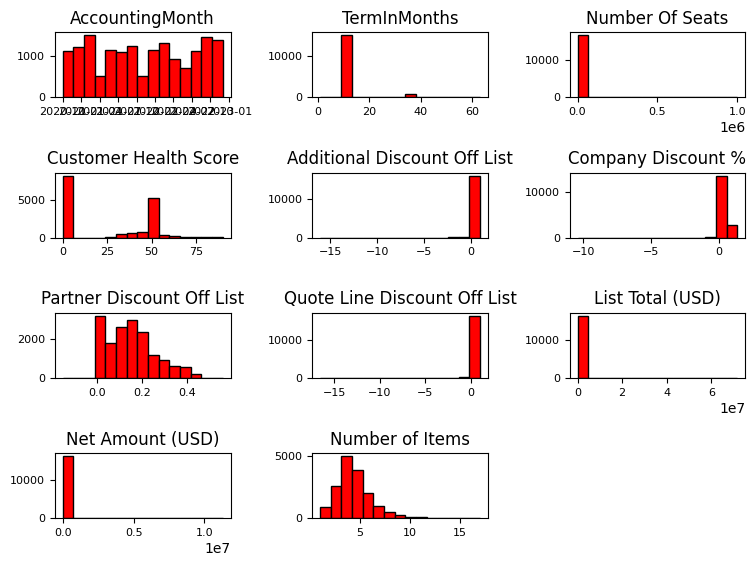

In [6]:
# Check on the data distribution for continuous dataset

df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

## Creating a list of variables for later model build up, some of variables in the dataset are removed

In [7]:
# Select variables that can be used to explain the model performance

predictive_variables = ['Industry Group', 'IsPrimary', 'Segmentation', 'Business Type', 
                     'Discount Deal Type', 'PartnerProcurementOption (DimOpportunity)', 'Reporting Region',
                     'TermInMonths', 'Partner Discount Off List', 'Quote Line Discount Off List','List Total (USD)',
                     'Net Amount (USD)', 'Number of Items']

target = 'Quote Status'

### Data clean up

In [ ]:
# remove data missing info
sub_df = df[predictive_variables + [target]]
sub_df = sub_df.dropna(subset=['TermInMonths', 'Partner Discount Off List'], inplace=False)
sub_df = sub_df.reset_index(drop=True)

### Convertion of categorical dataset using one hot encoder

In [8]:
# get all the categorical columns in X
categorical_columns = sub_df[predictive_variables].select_dtypes(include=['object']).columns.tolist()

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(sub_df[categorical_columns])

# # Create a DataFrame with the one-hot encoded columns
# # use get_feature_names_out() to get the column names for the encoded data
new_df = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded, columns=list(encoder.get_feature_names_out(categorical_columns)))

In [9]:
# Concatenate the one-hot encoded dataframe with the original dataframe
sub_df_encoded = pd.concat([sub_df, new_df], axis=1)

# Drop the original categorical columns
sub_df_encoded = sub_df_encoded.drop(categorical_columns, axis=1)

### Encode the target data

In [10]:
# encode prediction data
le = LabelEncoder()
le_class = le.fit_transform(sub_df[[target]])

/Users/mirandalv/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Build data for model training

In [11]:
# create variables for model training
x_df = sub_df_encoded.drop('Quote Status', axis=1)

y = le_class
X = x_df.values

In [16]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Model training

In [ ]:
# create a random forest with the default setting
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# make prediction
y_pred = rf.predict(X_test)

In [20]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6076288659793815


## Use random search to find the best hyperparameters

In [25]:

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

/Users/mirandalv/opt/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe18844f450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe19eb08090>})

In [28]:
y_pred_rand = rand_search.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rand))

Accuracy: 0.6241237113402062


### Understand the prediction with confusion matrix

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rand)

In [39]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6])

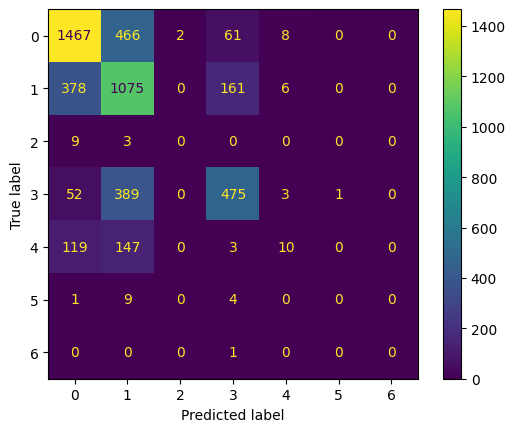

In [40]:
cm_display.plot()
plt.show()